## Indicadores escolhidos:
    Morte de crianças menores que 5 anos x Crianças com HIV
    Nas relações entre os indicadores, escolhi os seguintes países:
        América Latina: Brasil e Chile
        Europa Ocidental: França e Alemanha
        Ásia: China e India
        América do Norte: Estados Unidos e Canadá

## Testes de normalidade:
    Morte de crianças menores que 5 anos: Shapiro-Wilk
    Crianças com HIV: Shapiro-Wilk

## Testes de correlação para o ano de 2020:
    Morte de crianças menores que 5 anos x Crianças com HIV: Pearson

## Resultados:
    Morte de crianças menores que 5 anos x Crianças com HIV: Pearson
        América Latina: nan
        Europa Ocidental: 0.999 - Relação positiva entre os indicadores
        Ásia: nan
        América do Norte: nan
## Conclusão:
    A partir dos resultados obtidos, podemos concluir que existe uma relação positiva entre os indicadores Morte de crianças menores que 5 anos x Crianças com HIV para os países da Europa Ocidental, e não foi possível concluir nada sobre os outros países, pois no data set não havia dados suficientes para os mesmos.
        

In [29]:
import pandas as pd
from scipy.stats import shapiro, kstest
import matplotlib.pyplot as plt
import seaborn as sns

under_five_death = pd.read_csv('data/API_SH.DTH.MORT_DS2_en_csv_v2_5874150.csv')
children_hiv = pd.read_csv('data/API_SH.HIV.0014_DS2_en_csv_v2_5874175.csv')

def filter_by_country(df, country_list):
    return df[df['Country Name'].isin(country_list)]

country_list = ["United States", "Canada", "Brazil", "Chile", "China", "India", "Germany", "France"]

under_five_death = filter_by_country(under_five_death, country_list)
children_hiv = filter_by_country(children_hiv, country_list)
children_hiv

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
29,Brazil,BRA,Children (0-14) living with HIV,SH.HIV.0014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Canada,CAN,Children (0-14) living with HIV,SH.HIV.0014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Chile,CHL,Children (0-14) living with HIV,SH.HIV.0014,NaN,NaN,NaN,NaN,NaN,NaN,...,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,NaN,NaN
40,China,CHN,Children (0-14) living with HIV,SH.HIV.0014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,Germany,DEU,Children (0-14) living with HIV,SH.HIV.0014,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,200.0,NaN,NaN,NaN
77,France,FRA,Children (0-14) living with HIV,SH.HIV.0014,NaN,NaN,NaN,NaN,NaN,NaN,...,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,NaN,NaN
109,India,IND,Children (0-14) living with HIV,SH.HIV.0014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70000.0,NaN,NaN
251,United States,USA,Children (0-14) living with HIV,SH.HIV.0014,NaN,NaN,NaN,NaN,NaN,NaN,...,3800.0,3600.0,3300.0,3000.0,2800.0,2500.0,NaN,NaN,NaN,NaN


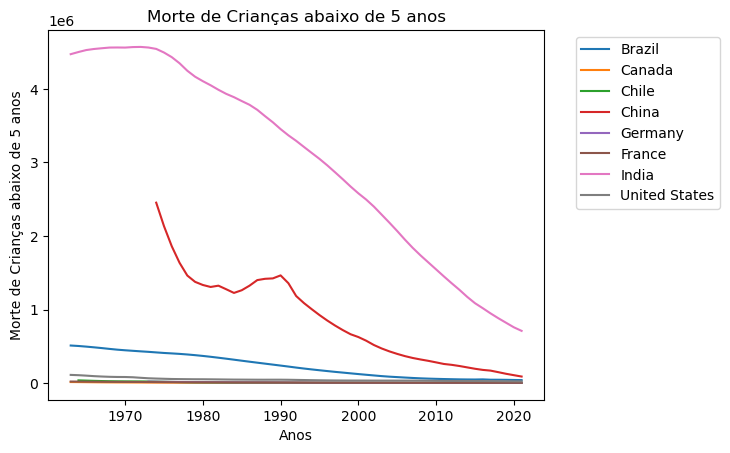

<Figure size 2000x1000 with 0 Axes>

In [14]:
def plot_df(df, title, xlabel, ylabel, size1, size2):
    df = df.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 67'], axis=1)
    df = df.dropna(axis=1, how='all')
    countries = df['Country Name'].unique()

    for country in countries:
        country_data = df[df['Country Name'] == country]
        country_data_values = country_data.iloc[:, 4:].values.flatten()
        years = country_data.columns[4:].astype(int)
        plt.plot(years, country_data_values, label=country)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    plt.figure(figsize=(size1,size2))

plot_df(under_five_death, 'Morte de Crianças abaixo de 5 anos', 'Anos', 'Morte de Crianças abaixo de 5 anos', 20, 10)

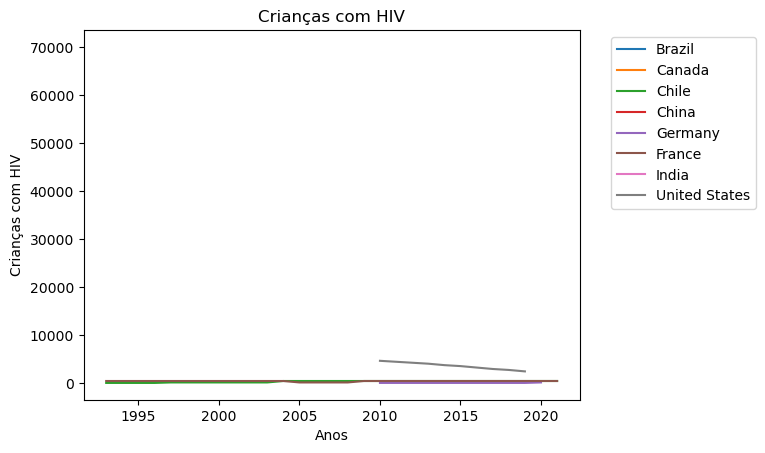

<Figure size 2000x1000 with 0 Axes>

In [15]:
plot_df(children_hiv, 'Crianças com HIV', 'Anos', 'Crianças com HIV', 20, 10)

In [16]:
stat_shapiro, p_shapiro = shapiro(under_five_death['2020'])
print(f'Teste de Shapiro-Wilk - Estatística: {stat_shapiro}, Valor-p: {p_shapiro}')

stat_shapiro, p_shapiro = shapiro(children_hiv['2020'])
print(f'Teste de Shapiro-Wilk - Estatística: {stat_shapiro}, Valor-p: {p_shapiro}')

Teste de Shapiro-Wilk - Estatística: 0.5207216739654541, Valor-p: 1.8325283235753886e-05
Teste de Shapiro-Wilk - Estatística: nan, Valor-p: 1.0


In [28]:
def pearson_correlation(df1, df2, year):
    col1 = df1[year]
    col2 = df2[year]
    return col1.corr(col2, method='pearson')

df_filter_forest = filter_by_country(under_five_death, ["China","India"])
df_filter_co2 = filter_by_country(children_hiv, ["China","India"])

print(f'Correlação de Pearson entre Morte de crianças com menos de 5 anos e Crianças que contém HIV em 2020: {pearson_correlation(df_filter_forest, df_filter_co2, "2020")}')

Correlação de Pearson entre Morte de crianças com menos de 5 anos e Crianças que contém HIV em 2020: nan


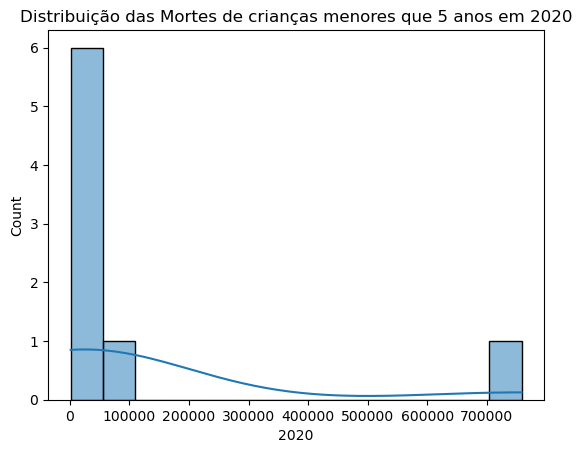

In [19]:
sns.histplot(under_five_death['2020'], kde=True)
plt.title('Distribuição das Mortes de crianças menores que 5 anos em 2020')
plt.show()